# UFO Sightings VS Characteristics of the Observing Population
##### Cody Costa, David Loi, Tue Pham
*Group 8*\
.
### links to sample data:
##### [UFOs](https://nuforc.org/subndx/?id=all) | [Population](https://worldpopulationreview.com/states) | [Education](https://worldpopulationreview.com/state-rankings/educational-attainment-by-state) | [Intelligence](https://katiecouric.com/lifestyle/travel/smartest-states-in-us/) | [Drug Activity](https://wallethub.com/edu/drug-use-by-state/35150)

# Synopsis:
##### this project attempts to illustrate a statistical link between cumulative cases of UFO sightings in the US with respect to characteristics of the general population inluding:

1. Average Standardized Intellience Metrics 
2. Education Level
3. Population size
4. Average Drug Addiction Rates

##### NOTE: Our UFO reports data is a sample of the 5000 most recent cases in the US out of hundreds of thousands available. The reality is that web scraping is kind of a pain in the butt
---

# Hypotheses

<div style='background-color: rgba(150, 150, 150, 0.1); padding: 10px; border-radius: 5px'>

### Null Hypothesis
<p>
    NO relation is seen between UFO sightings and the characteristics of the observing population
</p>

### Alternate Hypothesis
<p> 
    UFO sightings will INCREASE proportionally to a weighted combination of observer characteristics
</p>
<br>

### Rejection Criteria
<p>
    Recall that a P value of 0.05 or less is grounds for a success, allowing us to reject the null hypothesis
</p>

</div>

## Setup

#### Python Packages

In [252]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import os
import statsmodels.api as smf
from IPython.display import display, Math, Latex

#### Plot Format

In [253]:
sns.set_theme(rc={'figure.figsize':(20, 5)})

# Part 1:
## Create a Normalized Set of UFO Occurrence Data Based on Population Size
##### this will serve as the dependent variable through our analysis

## UFO Sightings

In [254]:
data = pd.read_csv('ufo-data-more.csv', sep=',')
print(data.shape)
data.head()

(5233, 4)


,Occurred,City,State,Country
0,06/10/2024 03:15,La Pine,OR,USA
1,06/09/2024 17:20,New York,NY,USA
2,06/09/2024 03:01,Satellite Beach,FL,USA
3,06/09/2024 01:14,Coopersville,MI,USA
4,06/08/2024 22:11,Boone,NC,USA


#### Filter Results
a visual inspection of the data shows some odd state names such as '-' or '0', etc.

In [255]:
data.describe()

,Occurred,City,State,Country
count,5233,5171,5233,5233
unique,4951,3009,54,1
top,10/13/2023 19:35,Los Angeles,CA,USA
freq,11,35,596,5233


In [256]:
f = []
for row in data['State']:
    if len(row) == 2:
        f.append(True)
    else:
        f.append(False)

data = data[f]

HEIGHT = data.shape[0]
WIDTH  = data.shape[1]

#### Distribution of Total Occurrences

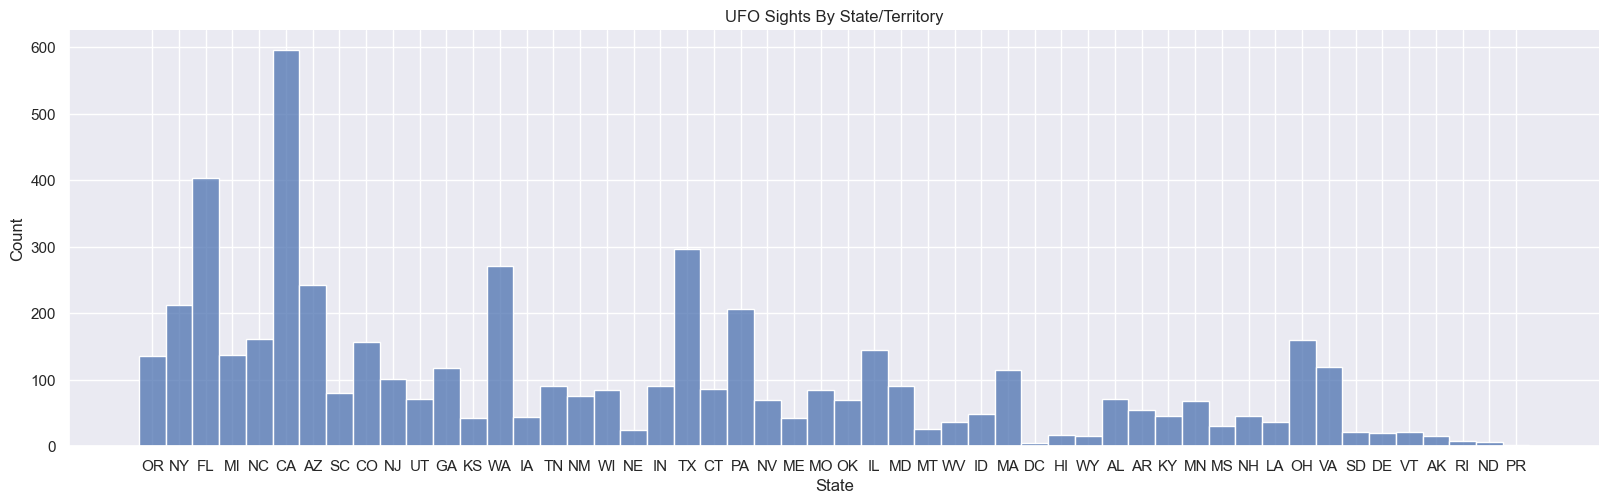

In [257]:
states = data['State']
bins = range(1, len(set(data['State'])) + 1)

sns.displot(data=states, aspect=3.25).set(title='UFO Sights By State/Territory')

## Population Sizes

In [258]:
pop = pd.read_csv('populations.csv', sep=',')
print(pop.shape)
pop.head()

# each column is loaded as str type

(50, 10)


,Rank,State Abbreviation,State,2024 Population,Growth Rate,2023 Population,2020 Population,Growth Since 2020,% of US,Density
0,1,CA,California,38889770,-0.0019,38965193,39503200,-0.0155,0.1158,250
1,2,TX,Texas,30976754,0.0155,30503301,29234361,0.0596,0.0922,119
2,3,FL,Florida,22975931,0.0162,22610726,21591299,0.0641,0.0684,428
3,4,NY,New York,19469232,-0.0052,19571216,20104710,-0.0316,0.0580,413
4,5,PA,Pennsylvania,12951275,-0.0008,12961683,12995477,-0.0034,0.0386,289


#### Distribution of Occurrences Normalized by Population Size

[Text(0.5, 1.0, 'Normalized UFO Sightings By Population')]

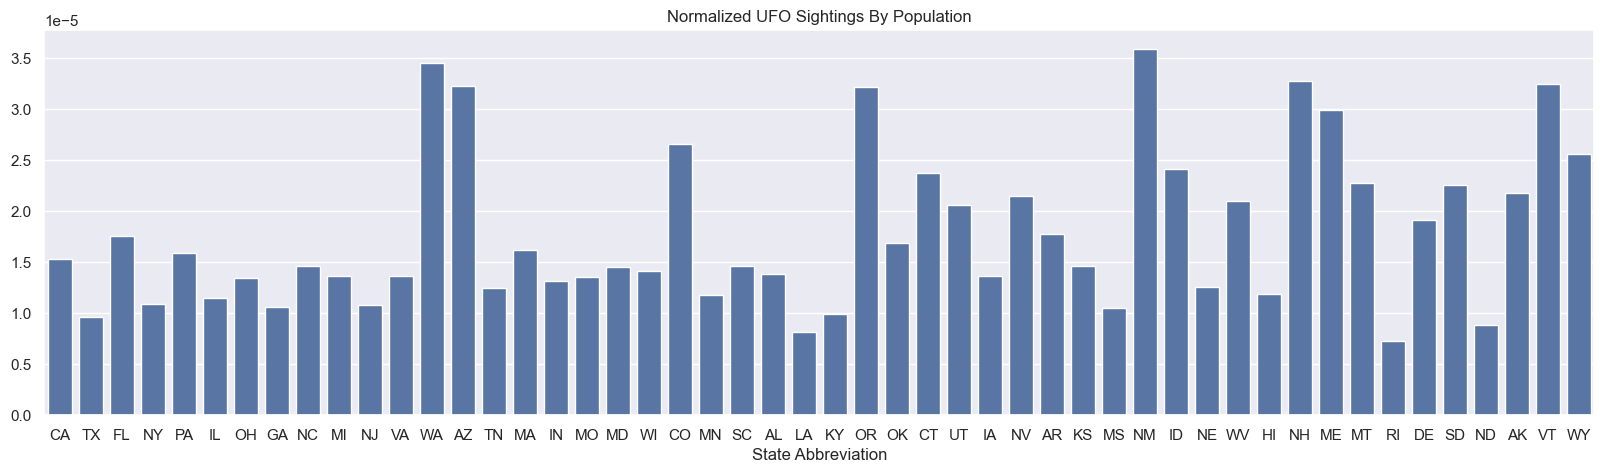

In [259]:
normalized_ufo_sightings = np.array([])

for idx, state in enumerate(pop['State Abbreviation']):
    sights = np.sum(data['State'] == state)
    population = pop['2024 Population'][idx]

    normalized_ufo_sightings = np.append(normalized_ufo_sightings, sights / population)

sns.barplot(x=pop['State Abbreviation'], y=normalized_ufo_sightings).set(title='Normalized UFO Sightings By Population')

# Part 2:
## Analysis of Environmental / Personal Factors

## Cognition / Intelligence

In [260]:
iq_data = pd.read_csv('iq-scores.csv', sep=',')
iq_data.shape
iq_data.head()

,Rank,State Abbreviation,State,Average I.Q.,Literacy Rate,Numeracy Rate,Average SAT Score
0,1,MA,Massachusetts,104.3,0.827,0.749,1029
1,2,NH,New Hampshire,104.2,0.885,0.809,1050
2,3,ND,North Dakota,103.8,0.866,0.790,1212
3,4,VT,Vermont,103.8,0.872,0.790,1095
4,5,MN,Minnesota,103.7,0.869,0.796,1225


#### Quick Data of SAT Scores and Avg I.Q.

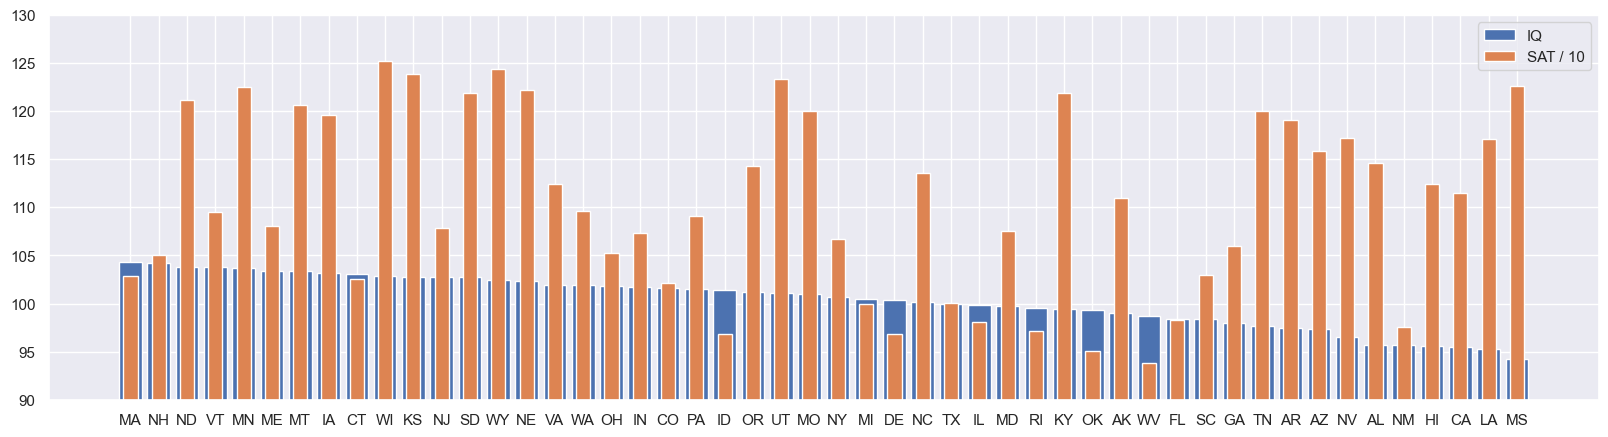

In [261]:
plt.figure(figsize=[20, 5])
plt.bar(iq_data['State Abbreviation'], iq_data['Average I.Q.'])
plt.bar(iq_data['State Abbreviation'], iq_data['Average SAT Score'] / 10, width=0.5)
plt.legend(['IQ', 'SAT / 10'])
plt.ylim([90, 130])

plt.show()

#### Normalized UFO sightings vs Intelligence Category

Text(0.5, 0.98, 'Normalized UFO Sights vs Intelligence Metrics')

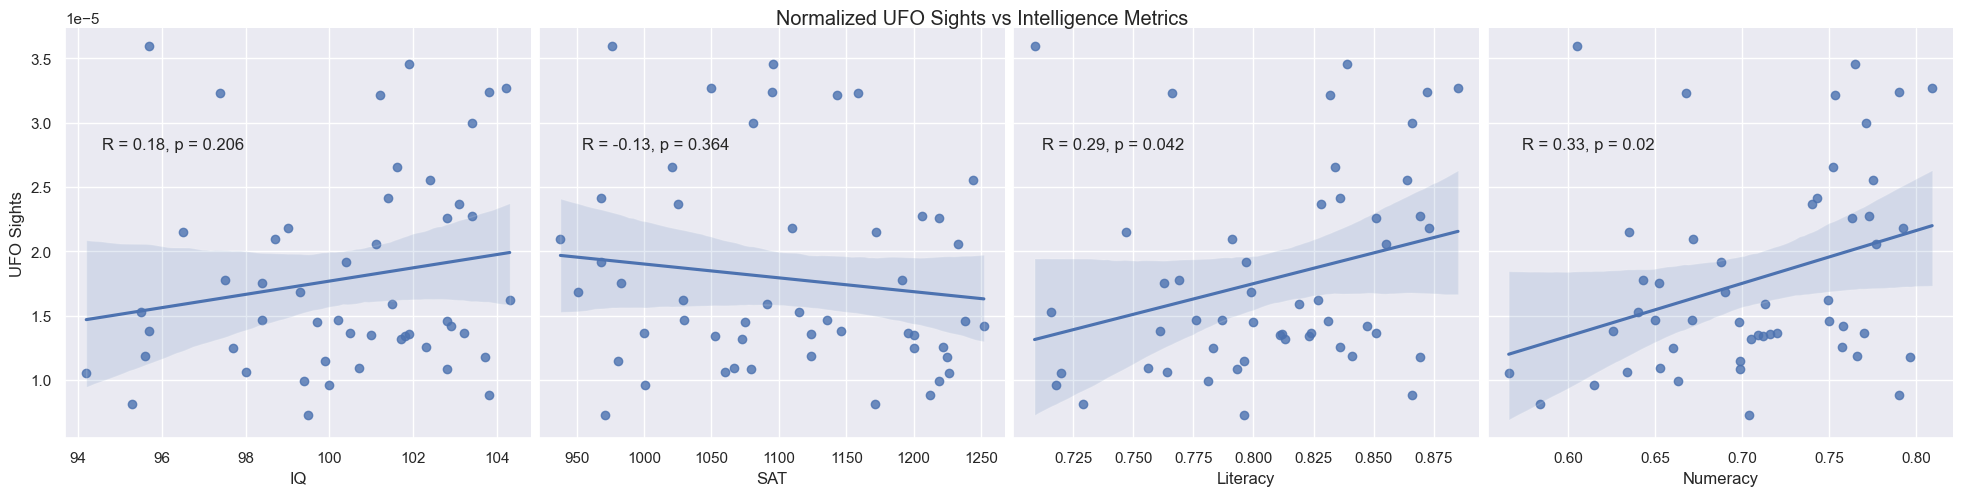

In [262]:
iq_scores   = np.array([])
sat_scores  = np.array([])
literacy    = np.array([])
numeracy    = np.array([])

for idx, state in enumerate(pop['State Abbreviation']):
    row = iq_data['State Abbreviation'] == state
    iq_scores   = np.append(iq_scores, iq_data[row]['Average I.Q.'])
    sat_scores  = np.append(sat_scores, iq_data[row]['Average SAT Score'])
    literacy    = np.append(literacy, iq_data[row]['Literacy Rate'])
    numeracy    = np.append(numeracy, iq_data[row]['Numeracy Rate'])

r1, p1 = stats.pearsonr(iq_scores, normalized_ufo_sightings)
r2, p2 = stats.pearsonr(sat_scores, normalized_ufo_sightings)
r3, p3 = stats.pearsonr(literacy, normalized_ufo_sightings)
r4, p4 = stats.pearsonr(numeracy, normalized_ufo_sightings)

pairs = pd.DataFrame({
    'IQ': iq_scores,
    'SAT': sat_scores,
    'Literacy': literacy,
    'Numeracy': numeracy,
    'UFO Sights': normalized_ufo_sightings
})

pp = sns.pairplot(data=pairs, x_vars=['IQ', 'SAT', 'Literacy', 'Numeracy'], y_vars='UFO Sights', kind='reg', height=5)

pp.figure.text(0.06, 0.7, f'R = {round(r1, 2)}, p = {round(p1, 3)}')
pp.figure.text(0.3, 0.7, f'R = {round(r2, 2)}, p = {round(p2, 3)}')
pp.figure.text(0.53, 0.7, f'R = {round(r3, 2)}, p = {round(p3, 3)}')
pp.figure.text(0.77, 0.7, f'R = {round(r4, 2)}, p = {round(p4, 3)}')
pp.figure.suptitle('Normalized UFO Sights vs Intelligence Metrics')

<div style='background-color: rgba(2, 250, 221, 0.1); padding: 10px; border-radius: 5px'>

### Conclusion of Cognitive Analysis

<p>
    From the visualization of the cognitive ability data, there seems to be a clear positive correlation between the instances of UFO sightings per individual and the strength of the cognitive ability. The only exception to this outcome is seen among average SAT scores where we observe the opposite: a negative correlation between the 2 variables.
</p>

<p>
    It is worth noting these are all relatively weak correlations. (R <= 0.4)
</p>

</div>

## Education Levels

In [263]:
education_data = pd.read_csv('education-levels.csv', sep='\t')
education_data.shape
education_data.head()

,State,State Abbreviation,High School or Higher,Bachelors or Higher
0,Montana,MT,0.940,0.331
1,Wyoming,WY,0.936,0.282
2,Vermont,VT,0.935,0.397
3,Minnesota,MN,0.934,0.368
4,New Hampshire,NH,0.933,0.376


#### Normalized UFO Sightings VS Education Level

Text(0.5, 0.98, 'Normalized UFO Sights vs Education Level')

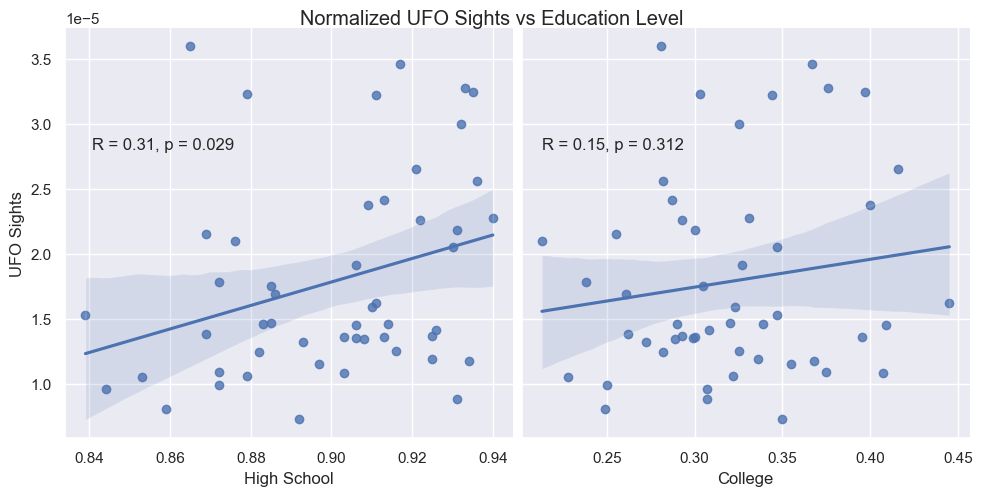

In [264]:
bachelors = np.array([])
high_school = np.array([])

for idx, state in enumerate(pop['State Abbreviation']):
    row = education_data['State Abbreviation'] == state
    bachelors = np.append(bachelors, education_data[row]['Bachelors or Higher'])
    high_school = np.append(high_school, education_data[row]['High School or Higher'])

r8, p8 = stats.pearsonr(high_school, normalized_ufo_sightings)
r9, p9 = stats.pearsonr(bachelors, normalized_ufo_sightings)

pairs = pd.DataFrame({
    'High School': high_school,
    'College': bachelors,
    'UFO Sights': normalized_ufo_sightings
})

pp = sns.pairplot(data=pairs, x_vars=['High School', 'College'], y_vars='UFO Sights', kind='reg', height=5)
pp.figure.text(0.1, 0.7, f'R = {round(r8, 2)}, p = {round(p8, 3)}')
pp.figure.text(0.55, 0.7, f'R = {round(r9, 2)}, p = {round(p9, 3)}')
pp.figure.suptitle('Normalized UFO Sights vs Education Level')

<div style='background-color: rgba(2, 250, 221, 0.1); padding: 10px; border-radius: 5px'>

### Conclusion of Education Level Analysis

<p>
    In both cases of education level (high school vs college graduates) we observe a positive relationship with the normalized events of UFO sightings, though this relationship was slightly stronger among the high school grad population
</p>

<p>
    Overall, these relationships are relatively weak (R <= 0.4)
</p>

</div>

## Substance (Ab)use

In [265]:
drug_data = pd.read_csv('drug-use-data.csv', sep=',')
drug_data.shape
drug_data.head()

,Overall Rank,State Abbreviation,State,Total Score,Drug Use & Addiction Rank,Law Enforcement Rank,Drug Health Issues & Rehab Rank
0,1,NM,New Mexico,69.89,1,13,2
1,2,WV,West Virginia,63.56,5,3,18
2,3,NV,Nevada,56.93,11,29,1
3,4,DC,District of Columbia,56.61,3,31,3
4,5,CO,Colorado,56.46,16,4,17


#### Quick Drugs Use / Health Issues Data

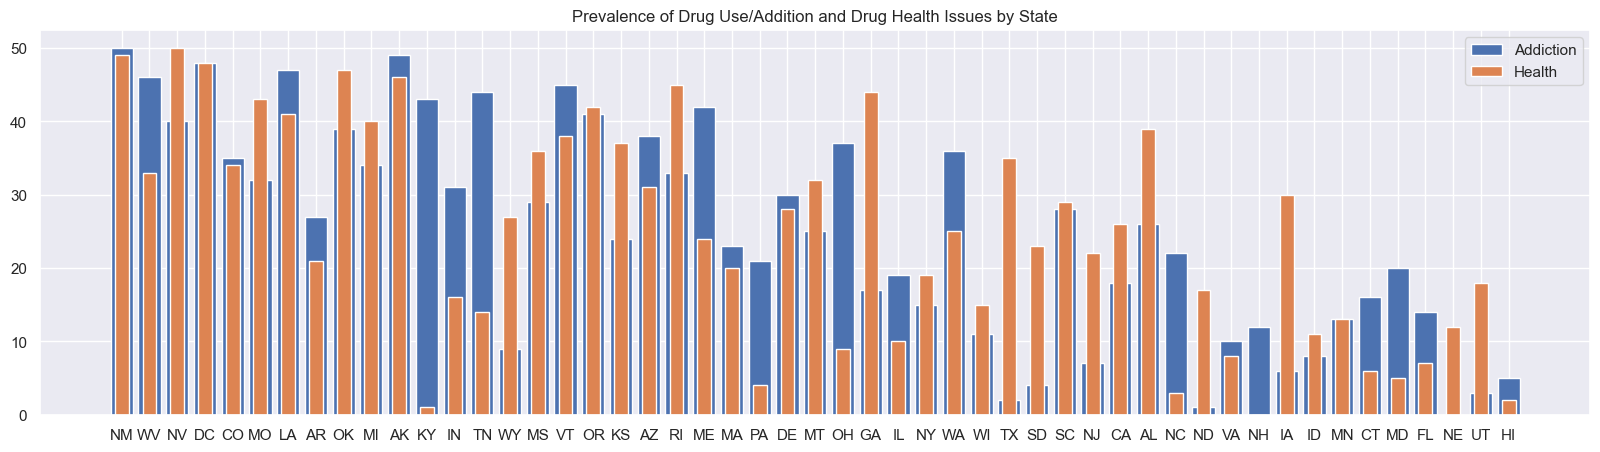

In [266]:
plt.figure(figsize=[20, 5])
plt.bar(drug_data['State Abbreviation'], 51 - drug_data['Drug Use & Addiction Rank'])
plt.bar(drug_data['State Abbreviation'], 51 - drug_data['Drug Health Issues & Rehab Rank'], width=0.5)
plt.title('Prevalence of Drug Use/Addition and Drug Health Issues by State')
plt.legend(['Addiction', 'Health'])
plt.show()

#### Normalized UFO Sightings VS Average % Population Drug Use

[Text(0.5, 1.0, 'Normalized UFO Sights vs Drug Use')]

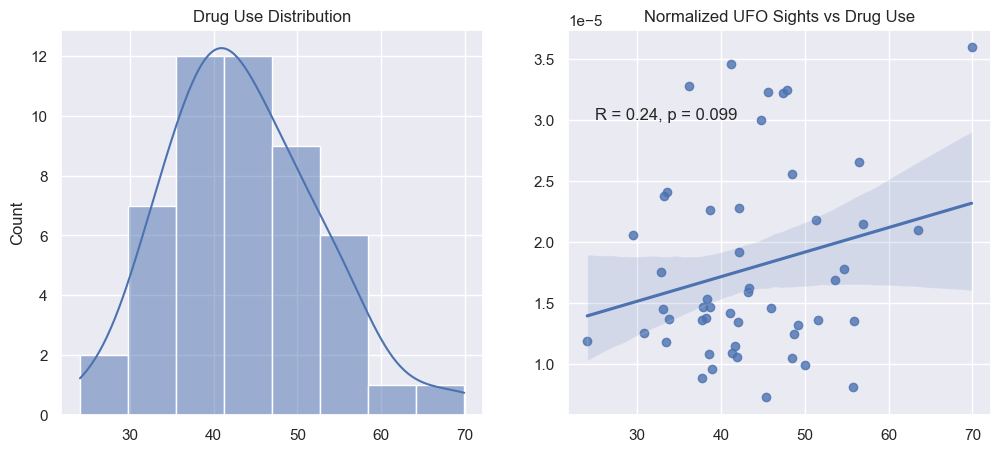

In [267]:
drug_scores = np.array([])

for idx, state in enumerate(pop['State Abbreviation']):
    row = drug_data['State Abbreviation'] == state
    drug_scores = np.append(drug_scores, drug_data[row]['Total Score'])

r5, p5 = stats.pearsonr(drug_scores, normalized_ufo_sightings)

fit, ax = plt.subplots(1, 2, figsize=[12, 5])
hist = sns.histplot(data=drug_scores, ax=ax[0], kde=True)
hist.set(title='Drug Use Distribution')
reg = sns.regplot(x=drug_scores, y=normalized_ufo_sightings, ax=ax[1])
reg.figure.text(0.57, 0.7, f'R = {round(r5, 2)}, p = {round(p5, 3)}')
reg.set(title='Normalized UFO Sights vs Drug Use')

<div style='background-color: rgba(2, 250, 221, 0.1); padding: 10px; border-radius: 5px'>
    
### Conclusion of Drug Use Relation Analysis

<p>
    Interestingly, the average percentage of a state's population that actively uses drugs is around 40%
</p>
<p>
    It is conclusive there is a positive relationship between UFO sightings and the fraction of the population using illicit substances, though still fairly weak (R <= 0.4)
</p>

</div>    

# Part 3:
## Combined Influence of Observer Characteristics
Now, what if we formulate an equation to give each category some weighted influence on the output readings?\
We can use the computed correlation coefficients as the relative weights of each category and compute a weighted average for comparison

### Weighted Average Approach

In [268]:
%%latex
\begin{align}
\frac{(0.16 * Avg IQ) + (0.12 * Avg SAT) + (0.18 * Literacy) + (0.23 * Numeracy) + (0.25 * Drug Use) + (0.21 * High School) + (0.14 * College)}{0.16 + 0.12 + 0.18 + 0.23 + 0.25 + 0.21 + 0.14}
\end{align}

<IPython.core.display.Latex object>

#### normalize array values to avoid skew

In [269]:
''' Data for plots '''

# no drug data used

WEIGHTED_INTELLIGENCE = (r1 * iq_scores/np.max(iq_scores) - r2 * sat_scores/np.max(sat_scores) + r3 * literacy/np.max(literacy) +
                         r4 * numeracy/np.max(numeracy) + r8 * high_school/np.max(high_school) + r9 * bachelors/np.max(bachelors)) / (r1 - r2 + r3 + r4 + r8 + r9)


# includes drug data

ENV_INFLUENCE = (r1 * iq_scores/np.max(iq_scores) - r2 * sat_scores/np.max(sat_scores) + r3 * literacy/np.max(literacy) + 
                 r4 * numeracy/np.max(numeracy) + r5 * drug_scores/np.max(drug_scores) + r8 * high_school/np.max(high_school) + r9 * bachelors/np.max(bachelors)) / (r1 - r2 + r3 + r4 + r5 + r8 + r9)

#### plot results

Text(0.5, 0.98, 'Normalized UFO Sights vs Influence')

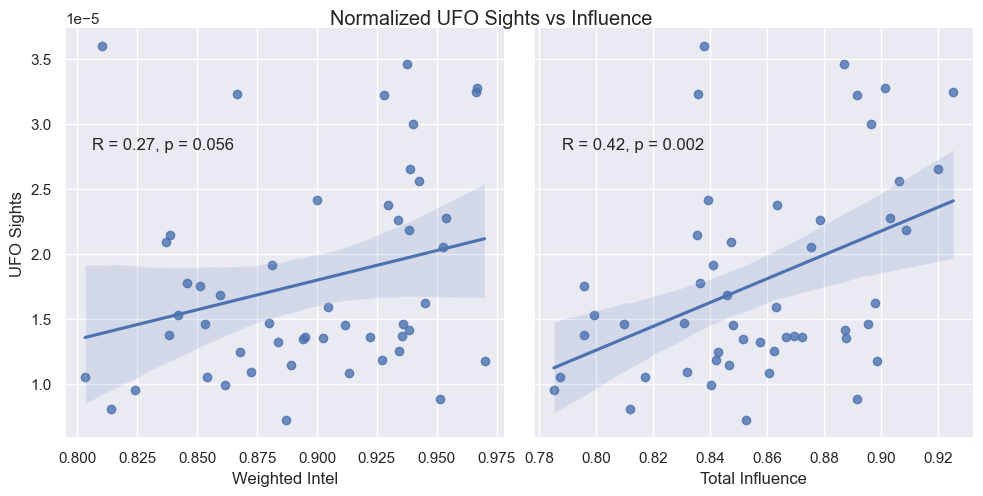

In [270]:
r6, p6 = stats.pearsonr(WEIGHTED_INTELLIGENCE, normalized_ufo_sightings)
r7, p7 = stats.pearsonr(ENV_INFLUENCE, normalized_ufo_sightings)

pairs = pd.DataFrame({
    'Weighted Intel': WEIGHTED_INTELLIGENCE,
    'Total Influence': ENV_INFLUENCE,
    'UFO Sights': normalized_ufo_sightings
})

pp = sns.pairplot(data=pairs, y_vars='UFO Sights', x_vars=['Weighted Intel', 'Total Influence'], kind='reg', height=5)
pp.figure.text(0.1, 0.7, f'R = {round(r6, 2)}, p = {round(p6, 3)}')
pp.figure.text(0.57, 0.7, f'R = {round(r7, 2)}, p = {round(p7, 3)}')
pp.figure.suptitle('Normalized UFO Sights vs Influence')

## Multivariate Regression Analysis

#### Recap of Gathered Data

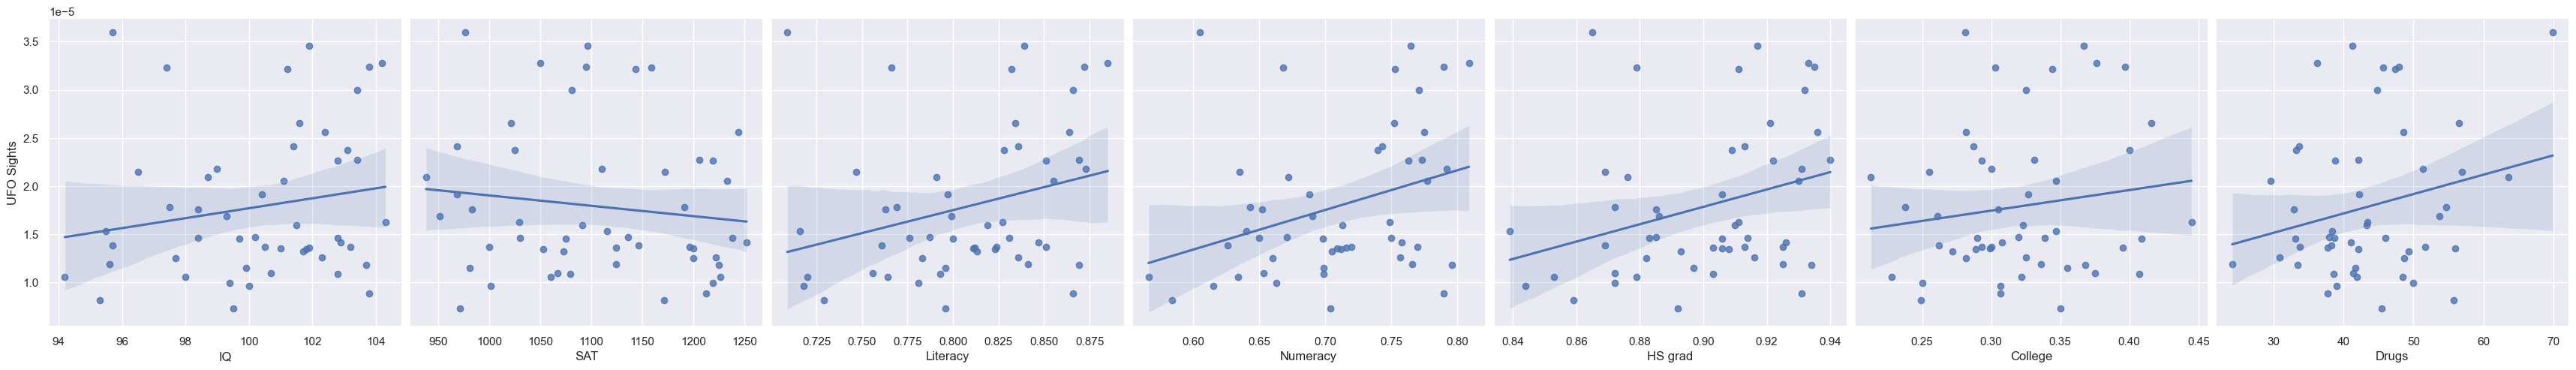

In [271]:
data_summary = pd.DataFrame({
    'IQ': iq_scores,
    'SAT': sat_scores,
    'Literacy': literacy,
    'Numeracy': numeracy,
    'HS grad': high_school,
    'College': bachelors,
    'Drugs': drug_scores,
    'UFO Sights': normalized_ufo_sightings
})

pp = sns.pairplot(data=data_summary, x_vars=data_summary.columns.values.tolist()[:-1], y_vars='UFO Sights', kind='reg', height=5)

#### Regression Model

In [272]:
# pandas df to dump data into

multi_regression_data = pd.DataFrame({
    'IQ': iq_scores,
    'SAT': sat_scores,
    'Literacy': literacy,
    'Numeracy': numeracy,
    'HS grad': high_school,
    'College': bachelors,
    'Drugs': drug_scores
})

multi_regression_data.head()

,IQ,SAT,Literacy,Numeracy,HS grad,College,Drugs
0,95.5,1115.0,0.716,0.640,0.839,0.347,38.40
1,100.0,1001.0,0.718,0.615,0.844,0.307,38.98
2,98.4,983.0,0.763,0.652,0.885,0.305,32.89
3,100.7,1067.0,0.756,0.653,0.872,0.375,41.36
4,101.5,1091.0,0.819,0.713,0.910,0.323,43.30


In [273]:
model = smf.OLS(pd.DataFrame({'UFO sights': normalized_ufo_sightings}), multi_regression_data).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             UFO sights   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              54.17
Date:                Fri, 21 Jun 2024   Prob (F-statistic):                    2.85e-19
Time:                        13:33:17   Log-Likelihood:                          528.62
No. Observations:                  50   AIC:                                     -1043.
Df Residuals:                      43   BIC:                                     -1030.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.2, 0.7, 'R = 0.58, p = 0.0')

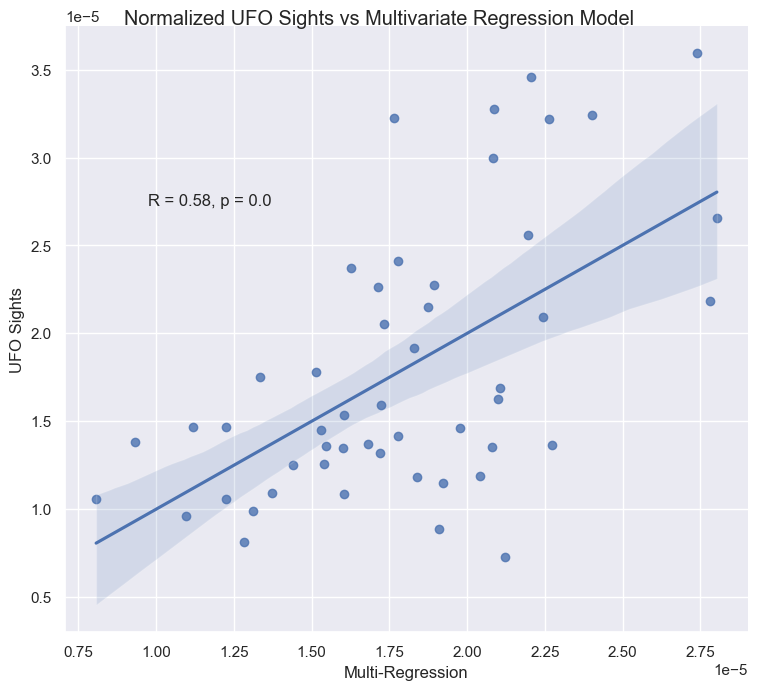

In [274]:
coeffs = model.params

output = coeffs * multi_regression_data
sums = np.sum(output, axis=1)

r10, p10 = stats.pearsonr(sums, normalized_ufo_sightings)

pp = sns.pairplot(pd.DataFrame({'Multi-Regression': sums, 'UFO Sights': normalized_ufo_sightings}), x_vars='Multi-Regression', y_vars='UFO Sights', height=7, kind='reg', aspect=1.1)
pp.figure.suptitle('Normalized UFO Sights vs Multivariate Regression Model')
pp.figure.text(0.2, 0.7, f'R = {round(r10, 2)}, p = {round(p10, 3)}')

<div style='background-color: rgba(2, 250, 221, 0.1); padding: 10px; border-radius: 5px'>

### Conclusion of Overall Data Analysis
#### WEIGHTED AVERAGE APPROACH:

<p>
    When considering the blend of intelligence and education data (excluding any drug use) a positive relationship is seen with a rather weak correlation (R <= 0.4). Including the weight of influence from drug usage, we see the trend double in strength, forming a moderately significant positive correlation.
</p>

#### MULTIVARIATE REGRESSION:

<p>
    The results of the multivariate regression rendered an even stronger relationship between the blend of observer characteristics and UFO occurrences. With a fairly strong regression coefficient of 0.58, and a high slope in the linear fit, it is evident there is a significant statistical connection between our variables.
</p>

</div>
<br>

<div style='background-color: rgba(0, 255, 13, 0.1); padding: 10px; border-radius: 5px'>

## RESULT:

<p>
    The processed data displays a clear relationship between normalized UFO sightings and our regression model well within the 0.05 confidence threshold.
    R > sqrt(2) / N ~= 0.28,    where N = 50 (sample size)
    P < 0.05
</p>

<p>
    Therefore, we can reject the Null Hypothesis that *NO* relation is seen between observer characteristics and the normalized instances of UFO sightings
</p>

</div>

# Notes

#### P value info

In [275]:
stats.pearsonr(sums, normalized_ufo_sightings)

PearsonRResult(statistic=0.5795370313500382, pvalue=1.0336370422241912e-05)

p val indicates likelihood that the results of the sample were due to random chance 

    p = 0:  unlikely to be random
    p = 1:  likely to be random

# Export as HTML

In [276]:
os.system('jupyter nbconvert project.ipynb --to html')

0